In [46]:
import pandas as pd
import os
import csv

In [47]:


def convert_txt_to_csv(folder_path):
    # List all files in the provided folder
    for filename in os.listdir(folder_path):
        # Check if the file is a .txt file
        # print(filename)
        if filename.endswith('.txt'):
            txt_file_path = os.path.join(folder_path, filename)
            
            # Read the .txt file
            with open(txt_file_path, 'r') as file:
                lines = file.readlines()
            
            # Process each line by splitting based on space
            data = [line.strip().split() for line in lines]
            
            # Prepare the .csv file name
            csv_file_path = os.path.join(folder_path, filename.replace('.txt', '.csv'))
            
            # Write the processed data to a .csv file
            with open(csv_file_path, 'w', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerows(data)
                
            print(f"Converted {filename} to {filename.replace('.txt', '.csv')}")
    
    print("All .txt files have been converted to .csv files.")

# Example usage
convert_txt_to_csv('Group13\\LS_Group13')
convert_txt_to_csv('Group13\\rd_group13')



Converted Class1.txt to Class1.csv
Converted Class2.txt to Class2.csv
Converted Class3.txt to Class3.csv
All .txt files have been converted to .csv files.
Converted class1.txt to class1.csv
Converted class2.txt to class2.csv
Converted class3.txt to class3.csv
All .txt files have been converted to .csv files.


In [48]:
filename='Group13\\NLS_Group13.txt'
with open(filename, 'r') as file:
    lines = file.readlines()

# Process each line by splitting based on space
data = [line.strip().split() for line in lines]
data.pop(0)
print(data[0])
# Prepare the .csv file name
os.makedirs('Group13/NLS_Group13',exist_ok=True)
csv_file_path =  'Group13\\NLS_Group13\\NLS_Group13.csv'

# Write the processed data to a .csv file
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)



['7.5717053e+00', '-8.7562601e+00']


In [49]:
input_csv_path='Group13/NLS_Group13/NLS_Group13.csv'

with open(input_csv_path, 'r') as infile:
    reader = list(csv.reader(infile))
        # Split the data into two parts
    data_part1 = reader[:1303]  # First 1303 rows
    data_part2 = reader[1303:]   # Remaining rows
    with open('Group13/NLS_Group13/class1.csv', 'w', newline='') as outfile1:
        writer = csv.writer(outfile1)
        writer.writerows(data_part1)

    # Write the second part to output_csv2
    with open('Group13/NLS_Group13/class2.csv', 'w', newline='') as outfile2:
        writer = csv.writer(outfile2)
        writer.writerows(data_part2)

In [50]:

def split_csv_file(folder_path, split_ratio):
    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a .csv file
        if filename.endswith('.csv'):
            input_csv_path = os.path.join(folder_path, filename)
            
            # Read the input CSV file using pandas to determine the number of rows
            df = pd.read_csv(input_csv_path)
            total_rows = df.shape[0]
            
            # Calculate the split index
            split_row = int(split_ratio * total_rows)
            
            # Read the CSV data
            with open(input_csv_path, 'r') as infile:
                reader = list(csv.reader(infile))
                
                # Split the data into two parts
                header = reader[0]
                data_part1 = reader[:split_row+1]  # First part (including header)
                data_part2 = reader[split_row+1:]  # Remaining part

            # Create directories if they don't exist
            test_path = os.path.join(folder_path, 'test')
            train_path = os.path.join(folder_path, 'train')
            os.makedirs(test_path, exist_ok=True)
            os.makedirs(train_path, exist_ok=True)
            
            # Write the first part to train CSV
            with open(os.path.join(train_path, filename), 'w', newline='') as outfile1:
                writer = csv.writer(outfile1)
                writer.writerows(data_part1)

            # Write the second part to test CSV
            with open(os.path.join(test_path, filename), 'w', newline='') as outfile2:
                writer = csv.writer(outfile2)
                writer.writerows(data_part2)

            print(f"Split {filename} into training and testing datasets.")

# Example usage
split_csv_file('Group13/LS_Group13', split_ratio=0.7)
split_csv_file('Group13/NLS_Group13', split_ratio=0.7)
split_csv_file('Group13/rd_group13', split_ratio=0.7)


Split Class1.csv into training and testing datasets.
Split Class2.csv into training and testing datasets.
Split Class3.csv into training and testing datasets.
Split class1.csv into training and testing datasets.
Split class2.csv into training and testing datasets.
Split NLS_Group13.csv into training and testing datasets.
Split class1.csv into training and testing datasets.
Split class2.csv into training and testing datasets.
Split class3.csv into training and testing datasets.


Class 1 Data:
            0          1
0  328.12500  734.37500
1  261.71875  730.46875
2  300.78125  667.96875
3  324.21875  691.40625
4  320.31250  625.00000
Class 2 Data:
            0           1
0  320.31250  1492.18750
1  265.62500  2335.93750
2  285.15625  2281.25000
3  238.28125  2402.34375
4  261.71875  2343.75000
Shape of Class 1 Data: (1741, 2)
Shape of Class 2 Data: (1671, 2)
x    2229.637879
y    6203.746376
dtype: float64
5029.544012955683


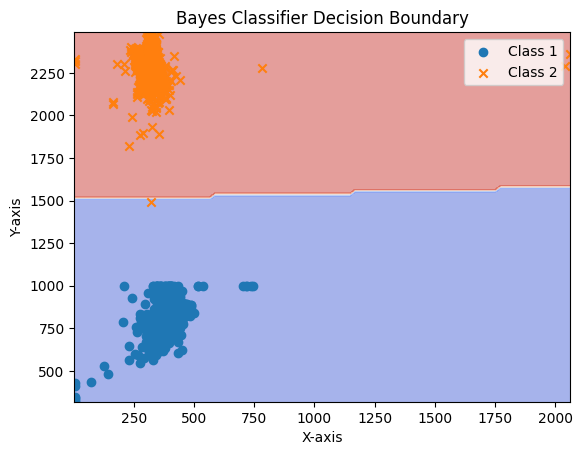

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Replace with the actual file paths
class_1_file = 'Group13\\rd_group13\\train\\class1.csv'
class_2_file = 'Group13\\rd_group13\\train\\class2.csv'

# Load the data from the CSV files without headers, assuming they are comma-separated
class_1_df = pd.read_csv(class_1_file, header=None)
class_2_df = pd.read_csv(class_2_file, header=None)

# Print the data to verify it was loaded correctly
print("Class 1 Data:\n", class_1_df.head())
print("Class 2 Data:\n", class_2_df.head())

# Check the shape of the dataframes
print("Shape of Class 1 Data:", class_1_df.shape)
print("Shape of Class 2 Data:", class_2_df.shape)

class_1_df.columns = ['x', 'y']
class_2_df.columns = ['x', 'y']

# Calculate covariance matrices for both classes
cov_class_1 = np.cov(class_1_df.T)
cov_class_2 = np.cov(class_2_df.T)

# Average the covariance matrices to obtain a common covariance matrix
avg_cov = (cov_class_1 + cov_class_2) / 2

# Calculate average variance
avg_var = np.mean([np.var(class_1_df, axis=0), np.var(class_2_df, axis=0)])
print(np.var(class_1_df, axis=0))
print(avg_var)
# Construct common covariance matrix (σ^2 I)
common_cov_matrix = avg_var * np.identity(class_1_df.shape[1])

# Compute mean vectors for each class
mean_class_1 = np.mean(class_1_df, axis=0)
mean_class_2 = np.mean(class_2_df, axis=0)

# Function to calculate the posterior probability for a given class
def multivariate_normal_pdf(x, mean, cov_matrix):
    x = np.array(x)
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    
    n = len(mean)
    diff = x - mean
    cov_matrix_inv = np.linalg.inv(cov_matrix)
    determinant = np.linalg.det(cov_matrix)
    
    exponent = -0.5 * np.dot(diff.T, np.dot(cov_matrix_inv, diff))
    coefficient = 1.0 / (np.sqrt((2 * np.pi) ** n * determinant))
    
    return coefficient * np.exp(exponent)


# Function to classify a point
def classify(x):
    posterior_class_1 = multivariate_normal_pdf(x, mean_class_1, common_cov_matrix)
    posterior_class_2 = multivariate_normal_pdf(x, mean_class_2, common_cov_matrix)
    return 1 if posterior_class_1 > posterior_class_2 else 2

# Create a meshgrid for plotting decision boundary
x_min, x_max = min(class_1_df['x'].min(), class_2_df['x'].min()) - 1, max(class_1_df['x'].max(), class_2_df['x'].max()) + 1
y_min, y_max = min(class_1_df['y'].min(), class_2_df['y'].min()) - 1, max(class_1_df['y'].max(), class_2_df['y'].max()) + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Classify each point in the meshgrid
Z = np.array([classify([x, y]) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(class_1_df['x'], class_1_df['y'], marker='o', label='Class 1')
plt.scatter(class_2_df['x'], class_2_df['y'], marker='x', label='Class 2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Bayes Classifier Decision Boundary')
plt.legend()
plt.show()

